In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import os
from model import Net
from utils import train,test
from data_transform import get_train_transform, get_test_transform
from data_loader import get_train_loader, get_test_loader, get_classes
from misclassified_image_utils import display_misclassfied_ciphar10_images
from plot_utils import plot_lists


In [2]:
train_transform = get_train_transform()
test_transform = get_test_transform()
train_loader = get_train_loader(128, train_transform)
test_loader = get_test_loader(128, test_transform)
classes = get_classes()

Files already downloaded and verified
Files already downloaded and verified


## Batch Normalization Processing

In [3]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_bn = Net('BN').to(device)
summary(model_bn, input_size=(3, 32, 32))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
         Dropout2d-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             512
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]           4,608
             ReLU-12           [-1, 32, 16, 16]               0
    

/content/model.py:108: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [4]:
from tqdm import tqdm

train_losses_bn = []
test_losses_bn = []
train_acc_bn = []
test_acc_bn = []


In [5]:
from torch.optim.lr_scheduler import StepLR

model_bn =  Net('BN').to(device)
optimizer = optim.SGD(model_bn.parameters(), lr=0.01, momentum=0.9)


EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train(model_bn, device, train_loader, optimizer, epoch, train_losses_bn, train_acc_bn )
    test(model_bn, device, test_loader, test_losses_bn , test_acc_bn)

EPOCH: 1


Loss=1.3794256448745728 Batch_id=390 Accuracy=41.29: 100%|██████████| 391/391 [00:05<00:00, 73.33it/s]



Test set: Average loss: 1.2387, Accuracy: 5522/10000 (55.22%)

EPOCH: 2


Loss=0.9978882670402527 Batch_id=390 Accuracy=55.55: 100%|██████████| 391/391 [00:05<00:00, 71.77it/s]



Test set: Average loss: 1.0437, Accuracy: 6309/10000 (63.09%)

EPOCH: 3


Loss=1.2970367670059204 Batch_id=390 Accuracy=61.59: 100%|██████████| 391/391 [00:05<00:00, 74.89it/s]



Test set: Average loss: 0.9341, Accuracy: 6686/10000 (66.86%)

EPOCH: 4


Loss=1.0660102367401123 Batch_id=390 Accuracy=65.47: 100%|██████████| 391/391 [00:05<00:00, 77.84it/s]



Test set: Average loss: 0.8480, Accuracy: 7037/10000 (70.37%)

EPOCH: 5


Loss=0.8692978620529175 Batch_id=390 Accuracy=67.74: 100%|██████████| 391/391 [00:05<00:00, 76.50it/s]



Test set: Average loss: 0.7773, Accuracy: 7319/10000 (73.19%)

EPOCH: 6


Loss=0.8483535647392273 Batch_id=390 Accuracy=69.09: 100%|██████████| 391/391 [00:05<00:00, 77.73it/s]



Test set: Average loss: 0.7659, Accuracy: 7366/10000 (73.66%)

EPOCH: 7


Loss=0.8089747428894043 Batch_id=390 Accuracy=70.64: 100%|██████████| 391/391 [00:05<00:00, 74.86it/s]



Test set: Average loss: 0.7137, Accuracy: 7543/10000 (75.43%)

EPOCH: 8


Loss=0.9946885108947754 Batch_id=390 Accuracy=71.71: 100%|██████████| 391/391 [00:05<00:00, 77.17it/s]



Test set: Average loss: 0.7036, Accuracy: 7602/10000 (76.02%)

EPOCH: 9


Loss=0.782004177570343 Batch_id=390 Accuracy=72.50: 100%|██████████| 391/391 [00:05<00:00, 76.94it/s]



Test set: Average loss: 0.6893, Accuracy: 7629/10000 (76.29%)

EPOCH: 10


Loss=0.8148024678230286 Batch_id=390 Accuracy=72.98: 100%|██████████| 391/391 [00:05<00:00, 75.90it/s]



Test set: Average loss: 0.6691, Accuracy: 7679/10000 (76.79%)

EPOCH: 11


Loss=0.8540315628051758 Batch_id=390 Accuracy=74.00: 100%|██████████| 391/391 [00:05<00:00, 76.35it/s]



Test set: Average loss: 0.6681, Accuracy: 7704/10000 (77.04%)

EPOCH: 12


Loss=0.8286134004592896 Batch_id=390 Accuracy=74.10: 100%|██████████| 391/391 [00:05<00:00, 75.02it/s]



Test set: Average loss: 0.6546, Accuracy: 7736/10000 (77.36%)

EPOCH: 13


Loss=0.897535502910614 Batch_id=390 Accuracy=74.68: 100%|██████████| 391/391 [00:05<00:00, 76.50it/s]



Test set: Average loss: 0.6409, Accuracy: 7799/10000 (77.99%)

EPOCH: 14


Loss=0.6861572861671448 Batch_id=390 Accuracy=75.02: 100%|██████████| 391/391 [00:04<00:00, 78.34it/s]



Test set: Average loss: 0.6480, Accuracy: 7756/10000 (77.56%)

EPOCH: 15


Loss=0.4795917868614197 Batch_id=390 Accuracy=75.44: 100%|██████████| 391/391 [00:05<00:00, 77.51it/s]



Test set: Average loss: 0.6265, Accuracy: 7851/10000 (78.51%)

EPOCH: 16


Loss=0.7791280150413513 Batch_id=390 Accuracy=75.70: 100%|██████████| 391/391 [00:05<00:00, 76.45it/s]



Test set: Average loss: 0.6183, Accuracy: 7870/10000 (78.70%)

EPOCH: 17


Loss=0.7471024990081787 Batch_id=390 Accuracy=76.43: 100%|██████████| 391/391 [00:05<00:00, 75.61it/s]



Test set: Average loss: 0.6159, Accuracy: 7906/10000 (79.06%)

EPOCH: 18


Loss=0.7202509641647339 Batch_id=390 Accuracy=76.50: 100%|██████████| 391/391 [00:05<00:00, 77.41it/s]



Test set: Average loss: 0.6178, Accuracy: 7876/10000 (78.76%)

EPOCH: 19


Loss=0.7655378580093384 Batch_id=390 Accuracy=76.55: 100%|██████████| 391/391 [00:05<00:00, 75.92it/s]



Test set: Average loss: 0.5966, Accuracy: 7939/10000 (79.39%)

EPOCH: 20


Loss=0.6979170441627502 Batch_id=390 Accuracy=76.92: 100%|██████████| 391/391 [00:05<00:00, 76.85it/s]



Test set: Average loss: 0.6091, Accuracy: 7859/10000 (78.59%)



## Display 10 misclassified images

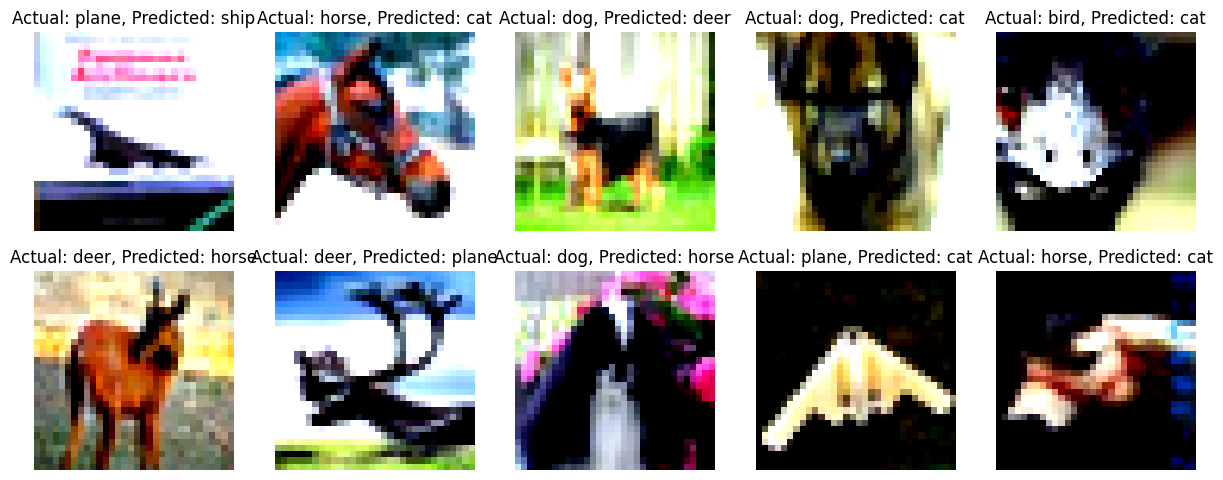

In [14]:
display_misclassfied_ciphar10_images(test_loader, model_bn, device, classes, 10)

## Layer Normalization Processing

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_ln = Net('LN').to(device)
summary(model_ln, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
         LayerNorm-3           [-1, 32, 32, 32]          65,536
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
         LayerNorm-7           [-1, 32, 32, 32]          65,536
         Dropout2d-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             512
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]           4,608
             ReLU-12           [-1, 32, 16, 16]               0
    

In [8]:
from tqdm import tqdm

train_losses_ln = []
test_losses_ln = []
train_acc_ln = []
test_acc_ln = []

In [9]:
from torch.optim.lr_scheduler import StepLR

model_ln =  Net('LN').to(device)
optimizer = optim.SGD(model_ln.parameters(), lr=0.01, momentum=0.9)


EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train(model_ln, device, train_loader, optimizer, epoch, train_losses_ln, train_acc_ln )
    test(model_ln, device, test_loader, test_losses_ln , test_acc_ln)

EPOCH: 1


Loss=1.447328805923462 Batch_id=390 Accuracy=37.95: 100%|██████████| 391/391 [00:05<00:00, 74.18it/s]



Test set: Average loss: 1.4034, Accuracy: 4781/10000 (47.81%)

EPOCH: 2


Loss=1.2387442588806152 Batch_id=390 Accuracy=50.80: 100%|██████████| 391/391 [00:05<00:00, 71.61it/s]



Test set: Average loss: 1.1176, Accuracy: 6046/10000 (60.46%)

EPOCH: 3


Loss=1.1292107105255127 Batch_id=390 Accuracy=58.00: 100%|██████████| 391/391 [00:05<00:00, 72.07it/s]



Test set: Average loss: 0.9864, Accuracy: 6545/10000 (65.45%)

EPOCH: 4


Loss=1.0076512098312378 Batch_id=390 Accuracy=62.54: 100%|██████████| 391/391 [00:05<00:00, 77.78it/s]



Test set: Average loss: 0.8789, Accuracy: 6973/10000 (69.73%)

EPOCH: 5


Loss=0.592694103717804 Batch_id=390 Accuracy=65.76: 100%|██████████| 391/391 [00:05<00:00, 76.10it/s]



Test set: Average loss: 0.8299, Accuracy: 7130/10000 (71.30%)

EPOCH: 6


Loss=0.9043337106704712 Batch_id=390 Accuracy=67.82: 100%|██████████| 391/391 [00:05<00:00, 72.57it/s]



Test set: Average loss: 0.7662, Accuracy: 7321/10000 (73.21%)

EPOCH: 7


Loss=0.6087104082107544 Batch_id=390 Accuracy=69.61: 100%|██████████| 391/391 [00:05<00:00, 76.18it/s]



Test set: Average loss: 0.7402, Accuracy: 7423/10000 (74.23%)

EPOCH: 8


Loss=0.807080090045929 Batch_id=390 Accuracy=70.43: 100%|██████████| 391/391 [00:05<00:00, 76.42it/s]



Test set: Average loss: 0.7338, Accuracy: 7483/10000 (74.83%)

EPOCH: 9


Loss=0.7872678637504578 Batch_id=390 Accuracy=71.44: 100%|██████████| 391/391 [00:05<00:00, 77.35it/s]



Test set: Average loss: 0.7157, Accuracy: 7536/10000 (75.36%)

EPOCH: 10


Loss=0.6510788202285767 Batch_id=390 Accuracy=72.37: 100%|██████████| 391/391 [00:05<00:00, 76.02it/s]



Test set: Average loss: 0.7116, Accuracy: 7577/10000 (75.77%)

EPOCH: 11


Loss=0.857796847820282 Batch_id=390 Accuracy=72.81: 100%|██████████| 391/391 [00:05<00:00, 73.79it/s]



Test set: Average loss: 0.7090, Accuracy: 7542/10000 (75.42%)

EPOCH: 12


Loss=0.952436625957489 Batch_id=390 Accuracy=74.02: 100%|██████████| 391/391 [00:05<00:00, 75.75it/s]



Test set: Average loss: 0.6855, Accuracy: 7594/10000 (75.94%)

EPOCH: 13


Loss=0.9869003295898438 Batch_id=390 Accuracy=74.49: 100%|██████████| 391/391 [00:05<00:00, 74.47it/s]



Test set: Average loss: 0.6515, Accuracy: 7724/10000 (77.24%)

EPOCH: 14


Loss=0.6416762471199036 Batch_id=390 Accuracy=74.92: 100%|██████████| 391/391 [00:05<00:00, 75.82it/s]



Test set: Average loss: 0.6454, Accuracy: 7799/10000 (77.99%)

EPOCH: 15


Loss=0.7322939038276672 Batch_id=390 Accuracy=75.68: 100%|██████████| 391/391 [00:05<00:00, 76.66it/s]



Test set: Average loss: 0.6388, Accuracy: 7828/10000 (78.28%)

EPOCH: 16


Loss=0.5932700634002686 Batch_id=390 Accuracy=75.78: 100%|██████████| 391/391 [00:05<00:00, 75.17it/s]



Test set: Average loss: 0.6243, Accuracy: 7882/10000 (78.82%)

EPOCH: 17


Loss=0.7065721750259399 Batch_id=390 Accuracy=76.17: 100%|██████████| 391/391 [00:05<00:00, 76.91it/s]



Test set: Average loss: 0.6387, Accuracy: 7786/10000 (77.86%)

EPOCH: 18


Loss=0.7517065405845642 Batch_id=390 Accuracy=76.32: 100%|██████████| 391/391 [00:05<00:00, 74.96it/s]



Test set: Average loss: 0.6201, Accuracy: 7889/10000 (78.89%)

EPOCH: 19


Loss=0.7331812381744385 Batch_id=390 Accuracy=76.81: 100%|██████████| 391/391 [00:05<00:00, 77.22it/s]



Test set: Average loss: 0.6080, Accuracy: 7920/10000 (79.20%)

EPOCH: 20


Loss=0.636642336845398 Batch_id=390 Accuracy=76.96: 100%|██████████| 391/391 [00:05<00:00, 75.01it/s]



Test set: Average loss: 0.6135, Accuracy: 7912/10000 (79.12%)



## Group Normalization Processing

In [10]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_gn = Net('GN').to(device)
summary(model_gn, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
         GroupNorm-3           [-1, 32, 32, 32]              64
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
         GroupNorm-7           [-1, 32, 32, 32]              64
         Dropout2d-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             512
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]           4,608
             ReLU-12           [-1, 32, 16, 16]               0
    

In [11]:
from tqdm import tqdm

train_losses_gn = []
test_losses_gn = []
train_acc_gn = []
test_acc_gn = []


In [12]:
from torch.optim.lr_scheduler import StepLR

model_gn =  Net('GN').to(device)
optimizer = optim.SGD(model_gn.parameters(), lr=0.01, momentum=0.9)


EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train(model_gn, device, train_loader, optimizer, epoch, train_losses_gn, train_acc_gn )
    test(model_gn, device, test_loader, test_losses_gn , test_acc_gn)

EPOCH: 1


Loss=1.383301019668579 Batch_id=390 Accuracy=37.18: 100%|██████████| 391/391 [00:05<00:00, 73.51it/s]



Test set: Average loss: 1.3828, Accuracy: 5058/10000 (50.58%)

EPOCH: 2


Loss=1.3082950115203857 Batch_id=390 Accuracy=51.49: 100%|██████████| 391/391 [00:05<00:00, 70.01it/s]



Test set: Average loss: 1.1645, Accuracy: 5810/10000 (58.10%)

EPOCH: 3


Loss=1.179551124572754 Batch_id=390 Accuracy=58.37: 100%|██████████| 391/391 [00:05<00:00, 74.35it/s]



Test set: Average loss: 1.0255, Accuracy: 6393/10000 (63.93%)

EPOCH: 4


Loss=1.0339794158935547 Batch_id=390 Accuracy=62.28: 100%|██████████| 391/391 [00:05<00:00, 74.53it/s]



Test set: Average loss: 0.9210, Accuracy: 6784/10000 (67.84%)

EPOCH: 5


Loss=0.9705697298049927 Batch_id=390 Accuracy=64.88: 100%|██████████| 391/391 [00:05<00:00, 74.89it/s]



Test set: Average loss: 0.8514, Accuracy: 7040/10000 (70.40%)

EPOCH: 6


Loss=0.7169359922409058 Batch_id=390 Accuracy=66.82: 100%|██████████| 391/391 [00:05<00:00, 72.68it/s]



Test set: Average loss: 0.8595, Accuracy: 7023/10000 (70.23%)

EPOCH: 7


Loss=0.9579843282699585 Batch_id=390 Accuracy=68.49: 100%|██████████| 391/391 [00:05<00:00, 74.91it/s]



Test set: Average loss: 0.8100, Accuracy: 7161/10000 (71.61%)

EPOCH: 8


Loss=0.8090888261795044 Batch_id=390 Accuracy=69.70: 100%|██████████| 391/391 [00:05<00:00, 76.16it/s]



Test set: Average loss: 0.7541, Accuracy: 7347/10000 (73.47%)

EPOCH: 9


Loss=0.7491293549537659 Batch_id=390 Accuracy=70.75: 100%|██████████| 391/391 [00:05<00:00, 73.56it/s]



Test set: Average loss: 0.7400, Accuracy: 7408/10000 (74.08%)

EPOCH: 10


Loss=0.7133821249008179 Batch_id=390 Accuracy=71.70: 100%|██████████| 391/391 [00:05<00:00, 75.22it/s]



Test set: Average loss: 0.7396, Accuracy: 7387/10000 (73.87%)

EPOCH: 11


Loss=0.8050190806388855 Batch_id=390 Accuracy=72.22: 100%|██████████| 391/391 [00:05<00:00, 75.15it/s]



Test set: Average loss: 0.7048, Accuracy: 7518/10000 (75.18%)

EPOCH: 12


Loss=1.1350265741348267 Batch_id=390 Accuracy=73.19: 100%|██████████| 391/391 [00:05<00:00, 76.24it/s]



Test set: Average loss: 0.6742, Accuracy: 7650/10000 (76.50%)

EPOCH: 13


Loss=0.7625331282615662 Batch_id=390 Accuracy=73.52: 100%|██████████| 391/391 [00:05<00:00, 75.15it/s]



Test set: Average loss: 0.6960, Accuracy: 7600/10000 (76.00%)

EPOCH: 14


Loss=0.793533444404602 Batch_id=390 Accuracy=74.14: 100%|██████████| 391/391 [00:05<00:00, 74.01it/s]



Test set: Average loss: 0.6539, Accuracy: 7727/10000 (77.27%)

EPOCH: 15


Loss=0.7128257751464844 Batch_id=390 Accuracy=74.55: 100%|██████████| 391/391 [00:05<00:00, 76.44it/s]



Test set: Average loss: 0.6544, Accuracy: 7728/10000 (77.28%)

EPOCH: 16


Loss=0.702094554901123 Batch_id=390 Accuracy=75.05: 100%|██████████| 391/391 [00:05<00:00, 71.07it/s]



Test set: Average loss: 0.6390, Accuracy: 7768/10000 (77.68%)

EPOCH: 17


Loss=0.8281800150871277 Batch_id=390 Accuracy=75.30: 100%|██████████| 391/391 [00:05<00:00, 75.47it/s]



Test set: Average loss: 0.6345, Accuracy: 7801/10000 (78.01%)

EPOCH: 18


Loss=0.7627604603767395 Batch_id=390 Accuracy=75.51: 100%|██████████| 391/391 [00:05<00:00, 76.91it/s]



Test set: Average loss: 0.6351, Accuracy: 7790/10000 (77.90%)

EPOCH: 19


Loss=0.6687757968902588 Batch_id=390 Accuracy=75.98: 100%|██████████| 391/391 [00:05<00:00, 73.39it/s]



Test set: Average loss: 0.6156, Accuracy: 7884/10000 (78.84%)

EPOCH: 20


Loss=0.8727132678031921 Batch_id=390 Accuracy=76.08: 100%|██████████| 391/391 [00:05<00:00, 76.75it/s]



Test set: Average loss: 0.6326, Accuracy: 7833/10000 (78.33%)



## Epoc vs Test Loss

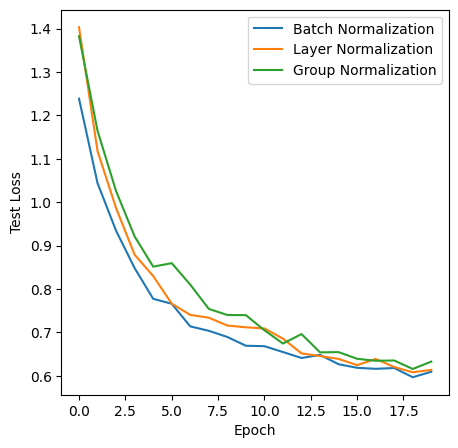

In [17]:
plot_lists("Epoch", "Test Loss", test_losses_bn, "Batch Normalization", test_losses_ln, "Layer Normalization",  test_losses_gn, "Group Normalization")

## Epoch vs Train Accuracy

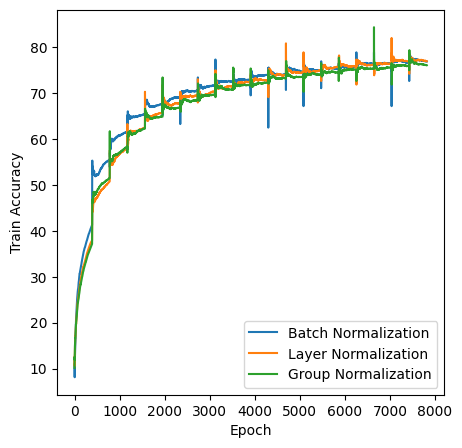

In [19]:
plot_lists("Epoch", "Train Accuracy", train_acc_bn, "Batch Normalization", train_acc_ln, "Layer Normalization",  train_acc_gn, "Group Normalization")

## Epoch vs Test Accuracy

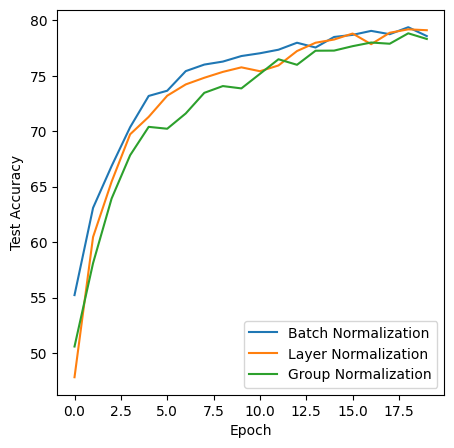

In [18]:
plot_lists("Epoch", "Test Accuracy", test_acc_bn, "Batch Normalization", test_acc_ln, "Layer Normalization",  test_acc_gn, "Group Normalization")

**bold text**